In [27]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import os
import scprep
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import LinearSegmentedColormap


plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

def score_MT(adata):
    mt_markers = adata.var_names[adata.var_names.str.startswith('MT-') == True]
    sc.tl.score_genes(adata, gene_list=mt_markers, score_name='MT_score')
    return adata


In [28]:
res_dir = '../results_Jul2/'
pathlib.Path(res_dir).mkdir(parents=True, exist_ok=True)

In [29]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

/tmp/tmp.u3kZmuhK4I/ipykernel_3073758/2417126526.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmax' will be ignored
  scatter = plt.scatter(adata.obsm['X_phate'][:, 0], adata.obsm['X_phate'][:, 1], c='lightgray', s=10, vmax=2)


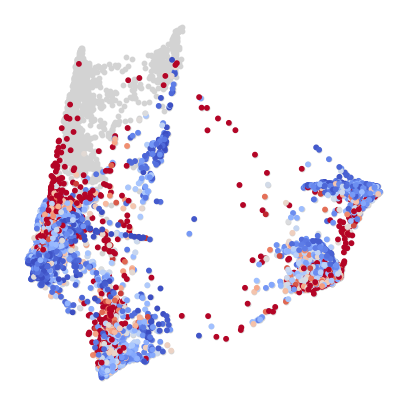

In [30]:
plt.figure(figsize=(5, 5))
scatter = plt.scatter(adata.obsm['X_phate'][:, 0], adata.obsm['X_phate'][:, 1], c='lightgray', s=10, vmax=2)
scatter = plt.scatter(adata.obsm['X_phate'][:, 0], adata.obsm['X_phate'][:, 1], c=adata.obs['growth'], cmap='coolwarm', s=10, vmax=2)
# plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.colorbar(scatter)
plt.savefig(f'{res_dir}/proliferation_rate.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

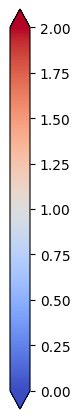

In [31]:
# Create a figure with just the colorbar
fig = plt.figure(figsize=(1, 5))
ax = fig.add_axes([0.3, 0.1, 0.2, 0.8])  # [left, bottom, width, height]

# Create a colorbar using the same parameters as the scatter plot
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=2)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, extend='both')
# cb.set_label('Growth Rate')

# Save just the colorbar
plt.savefig(f'{res_dir}/proliferation_rate_colorbar.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

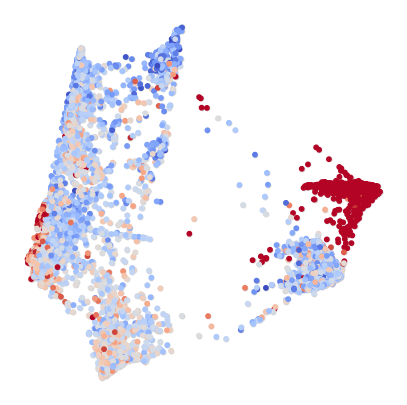

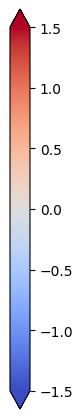

In [34]:
plt.figure(figsize=(5, 5))
scatter = plt.scatter(adata.obsm['X_phate'][:, 0], adata.obsm['X_phate'][:, 1], c='lightgray', s=10)
scatter = plt.scatter(adata.obsm['X_phate'][:, 0], adata.obsm['X_phate'][:, 1], c=adata.obs['emt_scores'], cmap='coolwarm', s=10, vmin=-1.5, vmax=1.5)
# plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.colorbar(scatter)
plt.savefig(f'{res_dir}/emt.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

# Create a figure with just the colorbar
fig = plt.figure(figsize=(1, 5))
ax = fig.add_axes([0.3, 0.1, 0.2, 0.8])  # [left, bottom, width, height]

# Create a colorbar using the same parameters as the scatter plot
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=-1.5, vmax=1.5)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, extend='both')

# Save just the colorbar
plt.savefig(f'{res_dir}/emt_colorbar.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

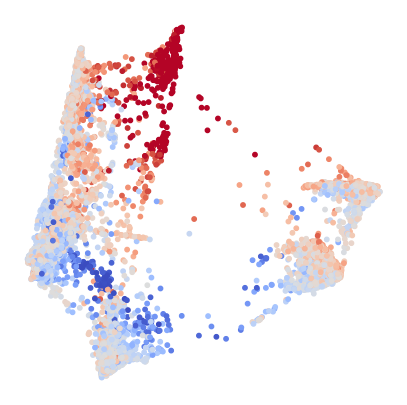

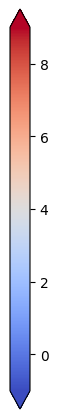

In [33]:
adata = score_MT(adata)
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(1, 1, 1)
phate_coords = adata[adata.obs['day'] == 30].obsm['X_phate']
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
phate_coords = adata.obsm['X_phate']

scatter = plt.scatter(adata.obsm['X_phate'][:, 0], adata.obsm['X_phate'][:, 1], c=adata.obs['MT_score'], cmap='coolwarm', s=10, vmin=-1, vmax=9)
# fig.tight_layout(pad=2)
# fig.savefig(f'{output_folder}/alldays_MT_score.png', dpi=300)
# plt.show()

# plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.colorbar(scatter)
plt.savefig(f'{res_dir}/mt.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

# Create a figure with just the colorbar
fig = plt.figure(figsize=(1, 5))
ax = fig.add_axes([0.3, 0.1, 0.2, 0.8])  # [left, bottom, width, height]

# Create a colorbar using the same parameters as the scatter plot
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=-1, vmax=9)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, extend='both')

# Save just the colorbar
plt.savefig(f'{res_dir}/mt_colorbar.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()